In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Total 15305 (delta 0), reused 0 (delta 0), pack-reused 15305
Receiving objects: 100% (15305/15305), 14.19 MiB | 26.95 MiB/s, done.
Resolving deltas: 100% (10500/10500), done.


In [ ]:
!cd yolov5 & pip install -r /content/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.3
    Uninstalling setuptools-63.4.3:
      Successfully uninstalled setuptools-63.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.3.0 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.


In [ ]:
!unzip /images.zip
!unzip /labels.zip

Archive:  /images.zip
  inflating: images/awake.f01b4d4b-c7f8-11ed-90f7-5c879c37fa6d.jpg  
  inflating: images/awake.f02b4d4b-c7f8-11ed-90f7-5c879c37fa6d.jpg  
  inflating: images/awake.f03b4d4b-c7f8-11ed-90f7-5c879c37fa6d.jpg  
  inflating: images/awake.f04b4d4b-c7f8-11ed-90f7-5c879c37fa6d.jpg  
  inflating: images/awake.f191fde7-c7f8-11ed-9ee5-5c879c37fa6d.jpg  
  inflating: images/awake.f2d1867c-c7f8-11ed-b811-5c879c37fa6d.jpg  
  inflating: images/awake.f4087c84-c7f8-11ed-926a-5c879c37fa6d.jpg  
  inflating: images/awake.f540eb73-c7f8-11ed-9c67-5c879c37fa6d.jpg  
  inflating: images/drowsy.f57d9aa5-c7f8-11ed-82d8-5c879c37fa6d.jpg  
  inflating: images/drowsy.f67d9aa5-c7f8-11ed-82d8-5c879c37fa6d.jpg  
  inflating: images/drowsy.f77d9aa5-c7f8-11ed-82d8-5c879c37fa6d.jpg  
  inflating: images/drowsy.f87d9aa5-c7f8-11ed-82d8-5c879c37fa6d.jpg  
  inflating: images/drowsy.f97d9aa5-c7f8-11ed-82d8-5c879c37fa6d.jpg  
  inflating: images/drowsy.fabe18a1-c7f8-11ed-8eac-5c879c37fa6d.jpg  
  infl

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 400 --data /content/dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=/content/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=400, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, 

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

/usr/local/lib/python3.9/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirement "setuptools>=65.5.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/u

In [ ]:
model


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
results = model("/content/images/awake.f01b4d4b-c7f8-11ed-90f7-5c879c37fa6d.jpg")
results.print()

image 1/1: 533x800 1 awake
Speed: 32.8ms pre-process, 241.3ms inference, 1.4ms NMS per image at shape (1, 3, 448, 640)


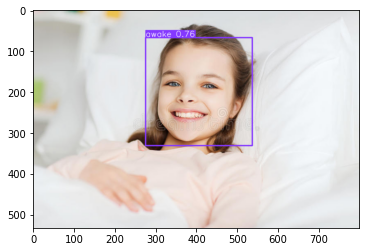

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 393x595 1 drowsy
Speed: 26.8ms pre-process, 240.9ms inference, 0.9ms NMS per image at shape (1, 3, 448, 640)


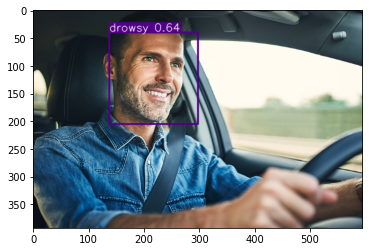

In [ ]:
results = model("/image6.png")
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
plt.imsave("results.png", np.squeeze(results.render()))

In [ ]:
output_img=results.render()

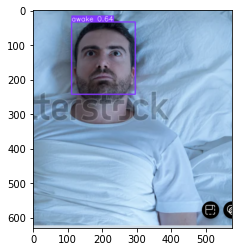

In [ ]:
plt.imshow(np.squeeze(output_img))

In [ ]:
plt.imsave("results.png", np.squeeze(results.render()))

In [ ]:
!pip install pipreqs



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=fc3353f8d8dec6a3d80b3785ce50a7fd98a3a7533b1b085e9a9ea9a7c4646936
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
!pip install pip-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pipreqs /content --force


INFO: Successfully saved requirements file in /content/requirements.txt
